In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 34.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


Grid Search:

In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
#from keras.wrappers.scikit_learn import KerasRegressor

# Load data
data = pd.read_csv("Clearness_Index.csv")
# Assuming you want to forecast based on the last column (ALLSKY_SFC_SW_DWN)
target_column = "ALLSKY_SFC_SW_DWN"

# Preprocess data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[[target_column]])

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Function to create time series dataset
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), 0]
        X.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

# Define time steps for the models
time_steps = 3

# Create the dataset with time steps
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

# Reshape input data to be 3D [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


# Define a function to create LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1),kernel_regularizer=regularizers.l2(0.01)))
    model.add(LSTM(50,kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Wrap Keras model so it can be used by Scikit-learn
lstm_regressor = KerasRegressor(build_fn=create_lstm_model, verbose=1)

# Define parameter grid for grid search
lstm_param_grid = {
    'epochs': [20],
    'batch_size': [64],
}

# Perform grid search
lstm_grid_search = GridSearchCV(estimator=lstm_regressor, param_grid=lstm_param_grid, cv=TimeSeriesSplit(n_splits = 2), scoring='neg_mean_squared_error')
lstm_grid_result = lstm_grid_search.fit(X_train, y_train)

# Print best parameters and results
print("Best Parameters for LSTM Model: ", lstm_grid_result.best_params_)
print("Best Score for LSTM Model: ", lstm_grid_result.best_score_)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


429/429 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.3328
Epoch 2/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0387
Epoch 3/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0153
Epoch 4/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0127
Epoch 5/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0117
Epoch 6/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0111
Epoch 7/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0108
Epoch 8/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0105
Epoch 9/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0103
Epoch 10/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0097
Epoch 11/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0099
Epoch 12/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0093
Epoch 13/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0090
Epoch 14/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0086
Epoch 15/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 0.2225
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0147
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.0122
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0109
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0101
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0097
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0094
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0088
Epoch 9/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0083
Epoch 10/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0082
Epoch 11/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0078
Epoch 12/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0075
Epoch 13/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0073
Epoch 14/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0071
Epoch 15/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1287/1287 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.1795
Epoch 2/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0125
Epoch 3/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0109
Epoch 4/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0098
Epoch 5/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0091
Epoch 6/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0085
Epoch 7/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0081
Epoch 8/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0075
Epoch 9/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0071
Epoch 10/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0069
Epoch 11/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0066
Epoch 12/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0064
Epoch 13/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0062
Epoch 14/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0060
Epoch 15/20
1287/1287 ━━━━

In [ ]:
# Define CNN model architecture
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_steps, 1),kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_regressor = KerasRegressor(build_fn=create_cnn_model, verbose=1)

cnn_param_grid = {
    'epochs': [20],
    'batch_size': [64],
}

cnn_grid_search = GridSearchCV(estimator=cnn_regressor, param_grid=cnn_param_grid, cv=TimeSeriesSplit(n_splits = 2), scoring='neg_mean_squared_error')
cnn_grid_result = cnn_grid_search.fit(X_train, y_train)

print("Best Parameters for CNN Model: ", cnn_grid_result.best_params_)
print("Best Score for CNN Model: ", cnn_grid_result.best_score_)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3099
Epoch 2/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0264
Epoch 3/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0193
Epoch 4/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0170
Epoch 5/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0155
Epoch 6/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0146
Epoch 7/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0137
Epoch 8/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0130
Epoch 9/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0125
Epoch 10/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0121
Epoch 11/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0117
Epoch 12/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0114
Epoch 13/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0111
Epoch 14/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0108
Epoch 15/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0107


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2085
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0197
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0160
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0142
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0131
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0122
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0115
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0111
Epoch 9/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0105
Epoch 10/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0102
Epoch 11/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0098
Epoch 12/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0096
Epoch 13/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0093
Epoch 14/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0091
Epoch 15/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0089


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1287/1287 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1576
Epoch 2/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0168
Epoch 3/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0134
Epoch 4/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0119
Epoch 5/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0108
Epoch 6/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0101
Epoch 7/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0095
Epoch 8/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0091
Epoch 9/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0088
Epoch 10/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0085
Epoch 11/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0082
Epoch 12/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0080
Epoch 13/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0078
Epoch 14/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0077
Epoch 15/20
1287/1287 ━━━━━━━━━━━━━━━━━━

In [ ]:
# Define RNN model architecture
def create_rnn_model():
    model = Sequential()
    model.add(SimpleRNN(50, return_sequences=True, input_shape=(time_steps, 1),kernel_regularizer=regularizers.l2(0.01)))
    model.add(SimpleRNN(50,kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

rnn_regressor = KerasRegressor(build_fn=create_rnn_model, verbose=1)

rnn_param_grid = {
    'epochs': [20],
    'batch_size': [64],
}

rnn_grid_search = GridSearchCV(estimator=rnn_regressor, param_grid=rnn_param_grid, cv=TimeSeriesSplit(n_splits = 2), scoring='neg_mean_squared_error')
rnn_grid_result = rnn_grid_search.fit(X_train, y_train)

print("Best Parameters for RNN Model: ", rnn_grid_result.best_params_)
print("Best Score for RNN Model: ", rnn_grid_result.best_score_)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3239
Epoch 2/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0216
Epoch 3/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0139
Epoch 4/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0128
Epoch 5/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0119
Epoch 6/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0115
Epoch 7/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0108
Epoch 8/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0104
Epoch 9/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0100
Epoch 10/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0096
Epoch 11/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0091
Epoch 12/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0088
Epoch 13/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0086
Epoch 14/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0081
Epoch 15/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0079


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2087
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0136
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0118
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0108
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0099
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0091
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0085
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0080
Epoch 9/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0074
Epoch 10/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0072
Epoch 11/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0069
Epoch 12/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0065
Epoch 13/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0064
Epoch 14/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0062
Epoch 15/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0061


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1287/1287 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.1405
Epoch 2/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0117
Epoch 3/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0099
Epoch 4/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0087
Epoch 5/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0078
Epoch 6/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0072
Epoch 7/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0068
Epoch 8/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0064
Epoch 9/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0061
Epoch 10/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0059
Epoch 11/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0057
Epoch 12/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0057
Epoch 13/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0055
Epoch 14/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0054
Epoch 15/20
1287/1287 ━━━━━━━━━━━━━━━━

In [ ]:
# Define MLP model architecture
def create_mlp_model():
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=time_steps, kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

mlp_regressor = KerasRegressor(build_fn=create_mlp_model, verbose=1)

mlp_param_grid = {
    'epochs': [20],
    'batch_size': [64],
}

mlp_grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=mlp_param_grid, cv=TimeSeriesSplit(n_splits = 2), scoring='neg_mean_squared_error')
mlp_grid_result = mlp_grid_search.fit(X_train.reshape(X_train.shape[0], X_train.shape[1]), y_train)

print("Best Parameters for MLP Model: ", mlp_grid_result.best_params_)
print("Best Score for MLP Model: ", mlp_grid_result.best_score_)



Epoch 1/20


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3398
Epoch 2/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0186
Epoch 3/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0139
Epoch 4/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0123
Epoch 5/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0113
Epoch 6/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0105
Epoch 7/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0101
Epoch 8/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0095
Epoch 9/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0093
Epoch 10/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0088
Epoch 11/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0086
Epoch 12/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0085
Epoch 13/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0082
Epoch 14/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0080
Epoch 15/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0078


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2150
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0120
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0101
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0092
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0086
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0081
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0078
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0075
Epoch 9/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0073
Epoch 10/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0070
Epoch 11/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0069
Epoch 12/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0067
Epoch 13/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0066
Epoch 14/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0065
Epoch 15/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0064


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1602
Epoch 2/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0111
Epoch 3/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0095
Epoch 4/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0085
Epoch 5/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0079
Epoch 6/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0075
Epoch 7/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0071
Epoch 8/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0068
Epoch 9/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0066
Epoch 10/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0064
Epoch 11/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0063
Epoch 12/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0062
Epoch 13/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0060
Epoch 14/20
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0058
Epoch 15/20
1287/1287 ━━━━━━━━━━━━━━━━━━

Cross Validation:

In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN
import matplotlib.pyplot as plt


# Load data
data = pd.read_csv("Clearness_Index.csv")
# Assuming you want to forecast based on the last column (ALLSKY_SFC_SW_DWN)
target_column = "ALLSKY_SFC_SW_DWN"

# Preprocess data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[[target_column]])

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Function to create time series dataset
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), 0]
        X.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

# Define time steps for the models
time_steps = 3

# Create the dataset with time steps
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

# Reshape input data to be 3D [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# Define LSTM model architecture
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1),kernel_regularizer=regularizers.l2(0.01)))
lstm_model.add(LSTM(50,kernel_regularizer=regularizers.l2(0.01)))
lstm_model.add(Dense(1))

# Compile LSTM model
lstm_model.compile(optimizer='adam', loss='mse')

# Fit LSTM model
lstm_model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=1)

# Define CNN model architecture
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_steps, 1),kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dense(1))

# Compile CNN model
cnn_model.compile(optimizer='adam', loss='mse')

# Fit CNN model
cnn_model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=1)

# Define RNN model architecture
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, return_sequences=True, input_shape=(time_steps, 1),kernel_regularizer=regularizers.l2(0.01)))
rnn_model.add(SimpleRNN(50,kernel_regularizer=regularizers.l2(0.01)))
rnn_model.add(Dense(1))

# Compile RNN model
rnn_model.compile(optimizer='adam', loss='mse')

# Fit RNN model
rnn_model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=1)

# Define MLP model architecture
mlp_model = Sequential()
mlp_model.add(Dense(100, activation='relu', input_dim=time_steps,kernel_regularizer=regularizers.l2(0.01)))
mlp_model.add(Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
mlp_model.add(Dense(1))

# Compile MLP model
mlp_model.compile(optimizer='adam', loss='mse')

# Fit MLP model
mlp_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1]), y_train, epochs=30, batch_size=64, verbose=1)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1287/1287 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.1770
Epoch 2/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0127
Epoch 3/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0109
Epoch 4/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0099
Epoch 5/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0091
Epoch 6/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0086
Epoch 7/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0082
Epoch 8/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0077
Epoch 9/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0072
Epoch 10/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0068
Epoch 11/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0065
Epoch 12/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0063
Epoch 13/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0062
Epoch 14/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0059
Epoch 15/30
1287/1287 ━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1287/1287 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1581
Epoch 2/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0162
Epoch 3/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0131
Epoch 4/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0116
Epoch 5/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0107
Epoch 6/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0099
Epoch 7/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0095
Epoch 8/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0090
Epoch 9/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0087
Epoch 10/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0085
Epoch 11/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0082
Epoch 12/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0081
Epoch 13/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0078
Epoch 14/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0077
Epoch 15/30
1287/1287 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1675
Epoch 2/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0116
Epoch 3/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0097
Epoch 4/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0088
Epoch 5/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0082
Epoch 6/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0077
Epoch 7/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0075
Epoch 8/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0072
Epoch 9/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0070
Epoch 10/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0069
Epoch 11/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0066
Epoch 12/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0065
Epoch 13/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0064
Epoch 14/30
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0063
Epoch 15/30
1287/1287 ━━━━━━━━━━━━━━━━━━

In [ ]:
# Wrap Keras models with KerasRegressor
lstm_regressor = KerasRegressor(build_fn=lstm_model, epochs=10, batch_size=64, verbose=1)
cnn_regressor = KerasRegressor(build_fn=cnn_model, epochs=10, batch_size=64, verbose=1)
rnn_regressor = KerasRegressor(build_fn=rnn_model, epochs=10, batch_size=64, verbose=1)
mlp_regressor = KerasRegressor(build_fn=mlp_model, epochs=10, batch_size=64, verbose=1)

# Perform cross-validation on each model
lstm_cv_scores = cross_val_score(estimator=lstm_regressor , X=X_train, y=y_train, cv=TimeSeriesSplit(n_splits=5), scoring='neg_mean_squared_error')
cnn_cv_scores = cross_val_score(estimator=cnn_regressor, X=X_train, y=y_train, cv=TimeSeriesSplit(n_splits=5), scoring='neg_mean_squared_error')
rnn_cv_scores = cross_val_score(estimator=rnn_regressor, X=X_train, y=y_train, cv=TimeSeriesSplit(n_splits=5), scoring='neg_mean_squared_error')
mlp_cv_scores = cross_val_score(estimator=mlp_regressor, X=X_train.reshape(X_train.shape[0], X_train.shape[1]), y=y_train, cv=TimeSeriesSplit(n_splits=5), scoring='neg_mean_squared_error')
#hybrid_cv_scores = cross_val_score(estimator=hybrid_model, X=X_train, y=y_train, cv=TimeSeriesSplit(n_splits=5), scoring='neg_mean_squared_error')

# Print cross-validation scores
print("Cross-Validation Scores for LSTM Model: ", (-lstm_cv_scores))
print("Cross-Validation Scores for CNN Model: ", (-cnn_cv_scores))
print("Cross-Validation Scores for RNN Model: ", (-rnn_cv_scores))
print("Cross-Validation Scores for MLP Model: ", (-mlp_cv_scores))
#print("Cross-Validation Scores for Hybrid Model: ", hybrid_cv_sco



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0043
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0043
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0043
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0044
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0043
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0043
Epoch 8/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0043
Epoch 9/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0042
Epoch 10/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0043
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


429/429 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0044
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0043
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0044
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0043
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0043
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0044
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0043
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0042
Epoch 9/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0042
Epoch 10/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0043
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


644/644 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0044
Epoch 2/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0046
Epoch 3/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0044
Epoch 4/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0043
Epoch 5/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0044
Epoch 6/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0043
Epoch 7/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0043
Epoch 8/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0043
Epoch 9/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0042
Epoch 10/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0042
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0044
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0045
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0044
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0044
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0044
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0044
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0043
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0043
Epoch 9/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0042
Epoch 10/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0042
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1073/1073 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0045
Epoch 2/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0045
Epoch 3/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0044
Epoch 4/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0044
Epoch 5/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0044
Epoch 6/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0044
Epoch 7/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0042
Epoch 8/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0043
Epoch 9/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0043
Epoch 10/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0041
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0060
Epoch 8/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0059
Epoch 9/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0061
Epoch 10/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0062
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0062
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0060
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0062
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0060
Epoch 9/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0060
Epoch 10/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0060
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0062
Epoch 2/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0063
Epoch 3/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0063
Epoch 4/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0063
Epoch 5/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061
Epoch 6/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061
Epoch 7/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0062
Epoch 8/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0062
Epoch 9/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0062
Epoch 10/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0063
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0062
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0062
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0061
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0061
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0063
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0061
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0062
Epoch 9/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0061
Epoch 10/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0059
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0063
Epoch 2/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0063
Epoch 3/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0063
Epoch 4/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0062
Epoch 5/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0062
Epoch 6/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0064
Epoch 7/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0063
Epoch 8/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0062
Epoch 9/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0061
Epoch 10/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0061
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0042
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0041
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0042
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0043
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0042
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0041
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0043
Epoch 8/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0041
Epoch 9/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0043
Epoch 10/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0042
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0042
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0043
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0042
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0043
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0043
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0042
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0042
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0043
Epoch 9/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0042
Epoch 10/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0042
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0044
Epoch 2/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0044
Epoch 3/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0044
Epoch 4/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0043
Epoch 5/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0044
Epoch 6/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0043
Epoch 7/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0043
Epoch 8/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0043
Epoch 9/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0043
Epoch 10/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0043
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0044
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0043
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0043
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0043
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0043
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0043
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0042
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0043
Epoch 9/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0042
Epoch 10/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0043
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0044
Epoch 2/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0045
Epoch 3/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0044
Epoch 4/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0046
Epoch 5/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0044
Epoch 6/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0044
Epoch 7/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0044
Epoch 8/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0043
Epoch 9/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0044
Epoch 10/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0042
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052
Epoch 2/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052
Epoch 3/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051
Epoch 4/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051
Epoch 5/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051
Epoch 6/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052
Epoch 7/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052
Epoch 8/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051
Epoch 9/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052
Epoch 10/10
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0052
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0053
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052
Epoch 9/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052
Epoch 10/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0052
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053
Epoch 2/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0054
Epoch 3/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053
Epoch 4/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053
Epoch 5/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052
Epoch 6/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053
Epoch 7/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052
Epoch 8/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053
Epoch 9/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0052
Epoch 10/10
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0053
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0053
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0052
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0052
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0053
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0052
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0052
Epoch 9/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0053
Epoch 10/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0052
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0054
Epoch 2/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0054
Epoch 3/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0054
Epoch 4/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0054
Epoch 5/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0053
Epoch 6/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0053
Epoch 7/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0053
Epoch 8/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0052
Epoch 9/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0052
Epoch 10/10
1073/1073 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0052
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Cross-Validation Scores for LSTM Model:  [0.00281335 0.00299759 0.00292037 0.00317305 0.00261617]
Cross-Validation Scores for CNN Model:  [0.0035106  0.00362602 0.00368156 0.00452454 0.00388642]
Cross-Validation Scores for RNN Model:  [0.00312976 0.00329291 0.00322494 0.00344087

In [ ]:
# Make predictions for all models
train_predict_lstm = lstm_model.predict(X_train)
test_predict_lstm = lstm_model.predict(X_test)

train_predict_cnn = cnn_model.predict(X_train)
test_predict_cnn = cnn_model.predict(X_test)

train_predict_rnn = rnn_model.predict(X_train)
test_predict_rnn = rnn_model.predict(X_test)

train_predict_mlp = mlp_model.predict(X_train.reshape(X_train.shape[0], X_train.shape[1]))
test_predict_mlp = mlp_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1]))

# Invert predictions to original scale
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
y_train = scaler.inverse_transform([y_train])
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
y_test = scaler.inverse_transform([y_test])

train_predict_cnn = scaler.inverse_transform(train_predict_cnn)
test_predict_cnn = scaler.inverse_transform(test_predict_cnn)

train_predict_rnn = scaler.inverse_transform(train_predict_rnn)
test_predict_rnn = scaler.inverse_transform(test_predict_rnn)

train_predict_mlp = scaler.inverse_transform(train_predict_mlp)
test_predict_mlp = scaler.inverse_transform(test_predict_mlp)

# Calculate MSE, MAE, R2 Score for LSTM model
train_mse_lstm = mean_squared_error(y_train[0], train_predict_lstm[:,0])
test_mse_lstm = mean_squared_error(y_test[0], test_predict_lstm[:,0])
train_mae_lstm = mean_absolute_error(y_train[0], train_predict_lstm[:,0])
test_mae_lstm = mean_absolute_error(y_test[0], test_predict_lstm[:,0])
train_r2_lstm = r2_score(y_train[0], train_predict_lstm[:,0])
test_r2_lstm = r2_score(y_test[0], test_predict_lstm[:,0])

# Calculate MSE, MAE, R2 Score for CNN model
train_mse_cnn = mean_squared_error(y_train[0], train_predict_cnn[:,0])
test_mse_cnn = mean_squared_error(y_test[0], test_predict_cnn[:,0])
train_mae_cnn = mean_absolute_error(y_train[0], train_predict_cnn[:,0])
test_mae_cnn = mean_absolute_error(y_test[0], test_predict_cnn[:,0])
train_r2_cnn = r2_score(y_train[0], train_predict_cnn[:,0])
test_r2_cnn = r2_score(y_test[0], test_predict_cnn[:,0])

# Calculate MSE, MAE, R2 Score for RNN model
train_mse_rnn = mean_squared_error(y_train[0], train_predict_rnn[:,0])
test_mse_rnn = mean_squared_error(y_test[0], test_predict_rnn[:,0])
train_mae_rnn = mean_absolute_error(y_train[0], train_predict_rnn[:,0])
test_mae_rnn = mean_absolute_error(y_test[0], test_predict_rnn[:,0])
train_r2_rnn = r2_score(y_train[0], train_predict_rnn[:,0])
test_r2_rnn = r2_score(y_test[0], test_predict_rnn[:,0])

2573/2573 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Hybrid Model Train RMSE: 55.68144948992275
Hybrid Model Test RMSE: 56.97773793852957
Hybrid Model Train MAE: 40.87020485507817
Hybrid Model Test MAE: 41.837469671444104
Hybrid Model Train MAPE: 0.4224388953399893
Hybrid Model Test MAPE: 0.42316553050118744
Hybrid Model Train R2 Score: 0.9566613999422926
Hybrid Model Test R2 Score: 0.9557586288765683


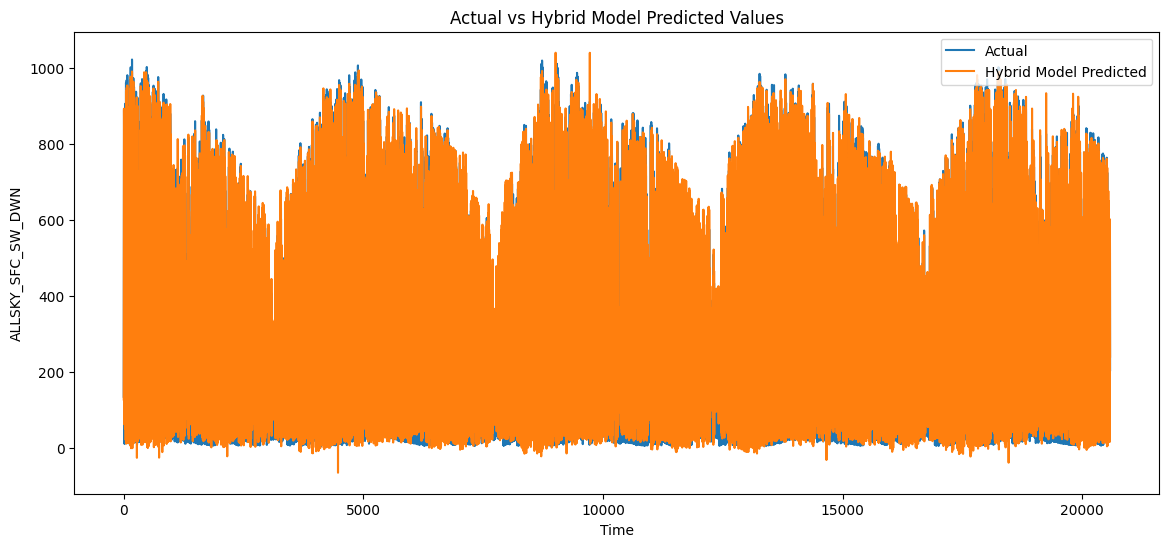

In [ ]:
# Combine predictions from all models
train_predict_hybrid = (train_predict_lstm + train_predict_cnn + train_predict_rnn + train_predict_mlp) / 4.0
test_predict_hybrid = (test_predict_lstm + test_predict_cnn + test_predict_rnn + test_predict_mlp) / 4.0

#train_predict_hybrid = np.concatenate([train_predict_lstm, train_predict_cnn, train_predict_rnn, train_predict_mlp], axis=1)
#test_predict_hybrid = np.concatenate([test_predict_lstm, test_predict_cnn, test_predict_rnn, test_predict_mlp], axis=1)

# Calculate MSE, MAE, R2 Score for hybrid model
train_mse_hybrid = mean_squared_error(y_train[0], train_predict_hybrid[:,0])
test_mse_hybrid = mean_squared_error(y_test[0], test_predict_hybrid[:,0])
train_mae_hybrid = mean_absolute_error(y_train[0], train_predict_hybrid[:,0])
test_mae_hybrid = mean_absolute_error(y_test[0], test_predict_hybrid[:,0])
train_r2_hybrid = r2_score(y_train[0], train_predict_hybrid[:,0])
test_r2_hybrid = r2_score(y_test[0], test_predict_hybrid[:,0])
train_mape_hybrid = mean_absolute_percentage_error(y_train[0], train_predict_hybrid[:,0])
test_mape_hybrid = mean_absolute_percentage_error(y_test[0], test_predict_hybrid[:,0])

print("Hybrid Model Train RMSE:", np.sqrt(train_mse_hybrid))
print("Hybrid Model Test RMSE:", np.sqrt(test_mse_hybrid))
print("Hybrid Model Train MAE:", train_mae_hybrid)
print("Hybrid Model Test MAE:", test_mae_hybrid)
print("Hybrid Model Train MAPE:", train_mape_hybrid)
print("Hybrid Model Test MAPE:", test_mape_hybrid)
print("Hybrid Model Train R2 Score:", train_r2_hybrid)
print("Hybrid Model Test R2 Score:", test_r2_hybrid)

# Plot actual vs forecasted values for hybrid model
plt.figure(figsize=(14, 6))
plt.plot(y_test.flatten(), label='Actual')
plt.plot(test_predict_hybrid.flatten(), label='Hybrid Model Predicted')
plt.title('Actual vs Hybrid Model Predicted Values')
plt.xlabel('Time')
plt.ylabel(target_column)
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Future Predictions Hybrid:
[[259.67706]
 [407.59918]
 [523.2564 ]
 [587.4686 ]
 [590.0655 ]]


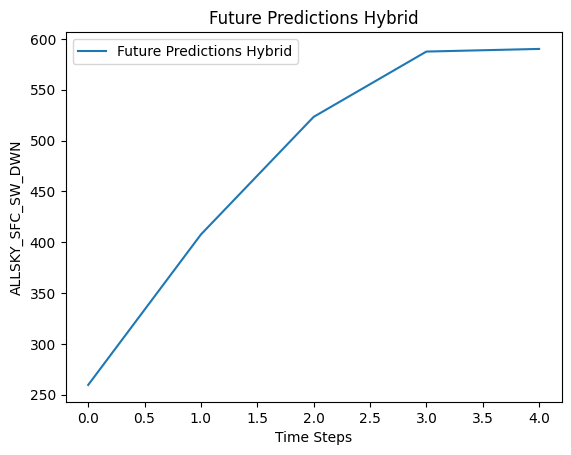

In [ ]:
# Function to predict future values beyond the dataset using the hybrid model
def predict_future_hybrid(initial_sequence, future_steps):
    current_sequence = initial_sequence.copy()
    predicted_values = []
    for i in range(future_steps):
        # Predict next value using the hybrid model
        next_value = (lstm_model.predict(current_sequence.reshape(1, time_steps, 1)) +
                      cnn_model.predict(current_sequence.reshape(1, time_steps, 1)) +
                      rnn_model.predict(current_sequence.reshape(1, time_steps, 1)) +
                      mlp_model.predict(current_sequence.reshape(1, time_steps))) / 4.0
        # Append to predicted values
        predicted_values.append(next_value)
        # Update current sequence by removing the first element and adding the predicted value
        current_sequence = np.append(current_sequence[1:], next_value)
    return np.array(predicted_values)

# Number of future time steps to predict
future_steps = 5

# Use the last sequence from the test set to start predicting future values
initial_sequence = X_test[-8, :, 0]

# Predict future values using the hybrid model
future_predictions_hybrid = predict_future_hybrid(initial_sequence, future_steps)

# Invert predictions to the original scale
future_predictions_hybrid = scaler.inverse_transform(future_predictions_hybrid.reshape(-1, 1))

# Print future predictions
print("Future Predictions Hybrid:")
print(future_predictions_hybrid)

# Plot future predictions
plt.plot(future_predictions_hybrid, label='Future Predictions Hybrid')
plt.title('Future Predictions Hybrid')
plt.xlabel('Time Steps')
plt.ylabel(target_column)
plt.legend()
plt.show()